## Displaying Data with Seaborn
### Thinkful Lesson 1.3.3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

I decided to complete this lesson with data files provided for introductory Statistics text, The Practice of Statistics by Yates/Moore/McCabe.  The first is high school graduation rates by State and by region.

In [2]:
grad_rate = pd.read_csv('~/Downloads/gradRate.csv')

In [3]:
print(grad_rate)

             STATE  PCTGRAD REGION
0          ALABAMA     72.0      S
1           ALASKA     68.0      W
2          ARIZONA     78.0      W
3         ARKANSAS     81.0      S
4       CALIFORNIA     76.0      W
5         COLORADO     74.0      W
6      CONNECTICUT     83.0     NE
7         DELAWARE     78.0      S
8               DC     59.0      S
9          FLORIDA     71.0      S
10         GEORGIA     67.0      S
11          HAWAII     80.0      W
12           IDAHO      NaN      W
13        ILLINOIS     84.0     MW
14         INDIANA     86.0     MW
15            IOWA     88.0     MW
16          KANSAS     83.0     MW
17        KENTUCKY      NaN      S
18       LOUISIANA     71.0      S
19           MAINE     84.0     NE
20        MARYLAND     83.0      S
21   MASSACHUSETTS     83.0     NE
22        MICHIGAN     74.0     MW
23       MINNESOTA     77.0     MW
24     MISSISSIPPI     75.0      S
25        MISSOURI     81.0     MW
26         MONTANA     82.0      W
27        NEBRASKA  

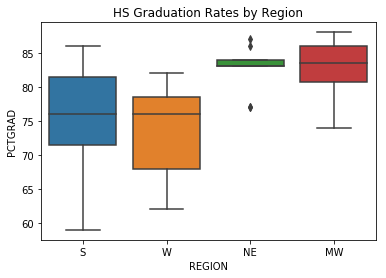

In [9]:
ax = sns.boxplot(x = 'REGION', y = 'PCTGRAD', data = grad_rate)
plt.title('HS Graduation Rates by Region')
plt.show()

The next data set I explored was a comparison of laundry soaps. Data was type (Liquid, Powder, Gel) Rating (higher is better) and PricePerLoad.

In [11]:
soap = pd.read_csv('~/Thinkful/soap.csv')

In [12]:
print(soap)

    ID    Type  Rating  PricePerLoad
0    1  Liquid      61            17
1    2  Liquid      59            22
2    3  Liquid      56            22
3    4  Liquid      55            16
4    5  Liquid      55            30
5    6  Liquid      52            23
6    7  Powder      51            11
7    8  Powder      50            15
8    9  Powder      50             9
9   10  Liquid      48            16
10  11  Powder      48            15
11  12  Powder      48            18
12  13     Gel      46            13
13  14     Gel      46            13
14  15  Powder      45            17
15  16  Powder      36             8
16  17  Powder      35             8
17  18  Powder      34            12
18  19  Powder      33             7
19  20  Powder      32             6
20  21  Powder      32             5
21  22  Powder      29            14
22  23  Powder      26            11
23  24  Powder      26            13


In [14]:
powder = soap.loc[(soap['Type']=='Powder'),'Rating']

In [15]:
Liq_Gel = soap.loc[(soap['Type']!='Powder'),'Rating']

NOTE:  Need to go over error below and talk about how to fix.

/home/john/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


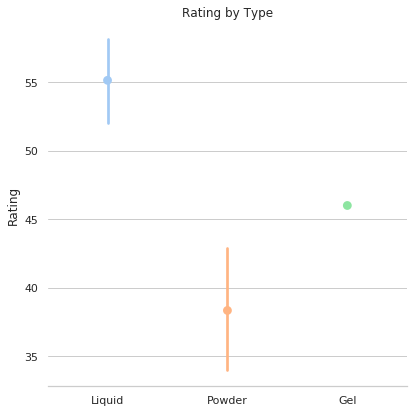

In [23]:
sns.set(style='whitegrid')
s = sns.catplot(x='Type',y='Rating',data=soap,
                   height=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)
s.despine(left=True)
s.set_ylabels("Rating")
s.set_xlabels("")
plt.title('Rating by Type')
plt.show()



Finally, let's just create a scatterplot to see if price and rating are at all correlated.

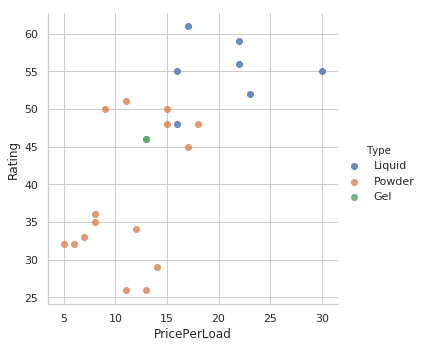

In [31]:
soapSP = sns.lmplot(y = 'Rating',
                    x = 'PricePerLoad',
                    data=soap,
                    fit_reg=False,
                    hue='Type',
                    ci = True)
plt.show()

Questions: How to get a regression line using ALL of the data?  These data are split by group at this point, so seaborn assumes you want regression lines for each data type.
